In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from scipy import stats
import pickle

In [2]:
%%time
data =  pd.read_csv("aug_jan_flights.csv")
data_2018 = pd.read_csv("Combined_Flights_2018.csv")

CPU times: user 35.9 s, sys: 9.69 s, total: 45.6 s
Wall time: 48.1 s


In [3]:
# data_2018.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [4]:
data.columns

Index(['MONTH', 'FL_DATE', 'ORIGIN', 'DEST', 'DEP_DELAY', 'DEP_DELAY_NEW',
       'DEP_DEL15', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY'],
      dtype='object')

## plots to support Carrier delay being the main contributer to arr delay


t-test
difference between mean

normalize by total delay - % 

barchart


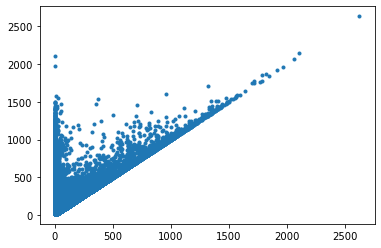

In [13]:
mask = data["CARRIER_DELAY"] >= 0
plt.plot(data[mask]["CARRIER_DELAY"], data[mask]["ARR_DELAY_NEW"], ".")

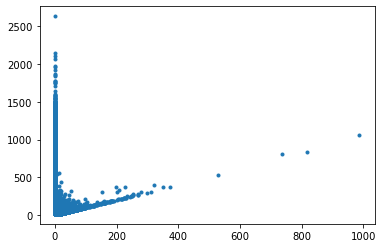

In [12]:
mask = data["SECURITY_DELAY"] >= 0
plt.plot(data[mask]["SECURITY_DELAY"], data[mask]["ARR_DELAY_NEW"], ".")

### SVM not sure why it would work any better

In [ ]:
%%time
#split 30-70 test-train data of columns i care about
data = data.dropna()
data_lr = data.filter(['MONTH', 'FL_DATE', 'ORIGIN', 'DEST', 'DEP_DELAY', 'DEP_DELAY_NEW',
       'DEP_DEL15', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY'])
target_lr = data["ARR_DELAY"]
train_data, test_data, train_target, test_target = train_test_split(
    data_lr, target_lr, test_size=0.3, random_state=999)
train_data

# SVM with previous data data

In [ ]:
%%time
#split 30-70 test-train data of columns i care about
data_2018 = data_2018[data_2018["Airline"] == "JetBlue Airways"].dropna()
# data_2018 = data_2018.dropna()


data_lr = data_2018.filter([ 'Origin', 'Dest',
       'Distance', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek'])
# data_lr = data_lr.dropna()
target_lr = data_2018["ArrDelayMinutes"]
# target_lr = target_lr.dropna()
train_data, test_data, train_target, test_target = train_test_split(
    data_lr, target_lr, test_size=0.3, random_state=999)
train_data
train_target_cat = train_target > 10
test_target_cat = test_target > 10
sum(train_target_cat)/len(train_target_cat)

In [ ]:
categorical = ['Origin', 'Dest']
numerical = ['Distance', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek']

encoded_train_data = np.append(OneHotEncoder().fit_transform(train_data[categorical].values).toarray(),
       train_data[numerical].values, axis =1)
encoded_test_data = np.append(OneHotEncoder().fit_transform(test_data[categorical].values).toarray(),
       test_data[numerical].values, axis =1)

len(encoded_train_data)

In [ ]:
%%time

model = SVC(kernel='rbf')
model.fit(encoded_train_data, train_target_cat)

In [ ]:
predicted_test=model.predict(encoded_test_data)
predicted_train=model.predict(encoded_train_data)
#Baseline Model
baseline=DummyClassifier(strategy="most_frequent")
baseline.fit(encoded_train_data, train_target_cat)
predicted_dummy=baseline.predict(encoded_test_data)

test_acc = accuracy_score(y_true=test_target_cat, y_pred=predicted_test) 
train_acc = accuracy_score(y_true=train_target_cat, y_pred=predicted_train)
dummy_acc = accuracy_score(y_true=test_target_cat, y_pred=predicted_dummy)

print("train acc: ", train_acc)
print("test acc: ", test_acc)
print("dummy acc: ", dummy_acc)

## Hypothesis test
H0 = same av arrival delay between Septemper and Decemeber
H1 = more in December because more flights

In [99]:
sep = data[data["MONTH"] == 9]["ARR_DELAY_NEW"].replace(np.nan,0).values
dec = data[data["MONTH"] == 12]["ARR_DELAY_NEW"].replace(np.nan,0).values
october = data[data["MONTH"] == 10]["ARR_DELAY_NEW"].replace(np.nan,0).values

# new_dec = np.append(dec, [1,3,4,10, 99999,2121])

confidence =stats.ttest_ind(dec, sep)
# print(len(sep), len(dec))
# print(The confidence
confidence

Ttest_indResult(statistic=11.90171177107051, pvalue=1.1640334201920073e-32)

In [103]:
print(np.mean(sep), np.mean(dec))

11.597664103987679 12.469127170523235


In [101]:
sep_oct = data[(data["MONTH"] == 9) | (data["MONTH"] == 10 ) ]["ARR_DELAY_NEW"].replace(np.nan,0).values
dec_jan = data[(data["MONTH"] == 12) | (data["MONTH"] == 1 )]["ARR_DELAY_NEW"].replace(np.nan,0).values
# october = data[data["MONTH"] == 10]["ARR_DELAY_NEW"].replace(np.nan,0).values

# new_dec = np.append(dec, [1,3,4,10, 99999,2121])

confidence =stats.ttest_ind(sep_oct, dec_jan)
# print(len(sep), len(dec))
# print(The confidence
confidence

Ttest_indResult(statistic=-31.263022926994413, pvalue=1.6287798611669867e-214)

In [5]:
print(len(sep), len(dec))

637614 649325


In [30]:
with open('sep.pickle', 'wb') as f:
    pickle.dump(sep, f)
    
with open('dec.pickle', 'wb') as f:
    pickle.dump(dec, f)  

In [46]:
confidence

Ttest_indResult(statistic=-11.90171177107051, pvalue=1.1640334201920073e-32)

## Normalize delay so can compare different reasons why

In [80]:
deleay_resons = ["CARRIER_DELAY","NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "NO_REASON" ]
xlabels = ["Carrier","NAS", "Security", "Late Aircraft", "No Reason" ]

y = []
tot = []

for reason in deleay_resons:
    # data[reason + "_sum"] = data[reason]/data["ARR_DELAY_NEW"]
    tot.append(data[reason].sum())
    y.append(data[reason + "%"].mean())
tot


[13434365.0, 11497489.0, 66728.0, 17987450.0, 3828408.0]

In [29]:

mask_nans = (data["ARR_DELAY_NEW"]>0) & (data["CARRIER_DELAY"].isna())

data["NO_REASON"] = data[mask_nans]["ARR_DELAY_NEW"]

data[mask_nans]


,MONTH,FL_DATE,ORIGIN,DEST,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CARRIER_DELAY%,NAS_DELAY%,SECURITY_DELAY%,LATE_AIRCRAFT_DELAY%,NO_REASON
4,8,8/11/2018 12:00:00 AM,SFO,FLL,3.0,3.0,0.0,3.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
9,8,8/16/2018 12:00:00 AM,SFO,FLL,6.0,6.0,0.0,3.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
22,8,8/29/2018 12:00:00 AM,SFO,FLL,1.0,1.0,0.0,14.0,14.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
26,8,8/2/2018 12:00:00 AM,LAS,LGB,9.0,9.0,0.0,7.0,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
32,8,8/8/2018 12:00:00 AM,LAS,LGB,8.0,8.0,0.0,6.0,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738219,1,1/2/2019 12:00:00 AM,IAH,HRL,1.0,1.0,0.0,9.0,9.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
3738221,1,1/4/2019 12:00:00 AM,IAH,HRL,-3.0,0.0,0.0,2.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3738230,1,1/13/2019 12:00:00 AM,IAH,HRL,-3.0,0.0,0.0,12.0,12.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
3738241,1,1/24/2019 12:00:00 AM,IAH,HRL,-5.0,0.0,0.0,8.0,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0


0.9668492804333266


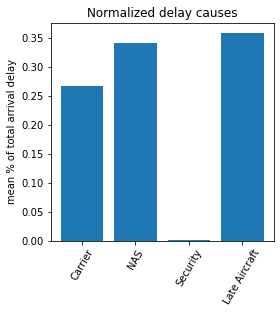

In [94]:
# sns.catplot(x = deleay_resons, y = y, kind = "bar")


#aircraft delay actually the main reason
# print(y)
plt.figure(figsize=(4, 4))


plt.bar(xlabels[:-1], y[:-1])
plt.ylabel("mean % of total arrival delay")
plt.xticks(rotation=60)
plt.title("Normalized delay causes")
print(sum(y[:-1]))

In [82]:
# plt.figure(figsize=(5, 5))
# plt.bar(xlabels, tot)
# plt.xticks(rotation=60)
# plt.ylabel("Total delay")

Text(0, 0.5, '% of total delay')

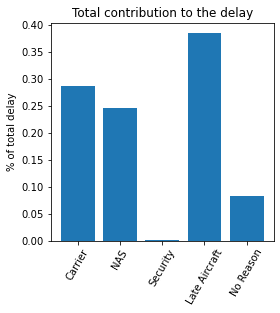

In [96]:
percent = tot/sum(tot)
plt.figure(figsize=(4,4))
plt.bar(xlabels, percent)
plt.title("Total contribution to the delay")
plt.xticks(rotation=60)
plt.ylabel("% of total delay")

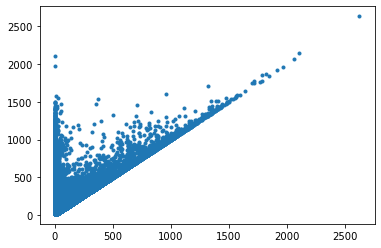

In [16]:
plt.plot(data["CARRIER_DELAY"], data["ARR_DELAY_NEW"], ".")

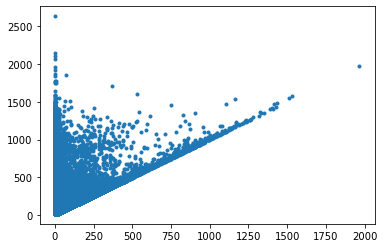

In [17]:
plt.plot(data["LATE_AIRCRAFT_DELAY"], data["ARR_DELAY_NEW"], ".")

## Check how this changes over different months and years

for September
0.9604508636180872


Text(0, 0.5, '% of total delay')

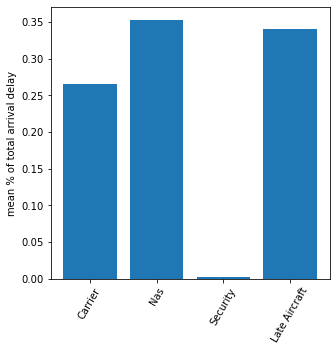

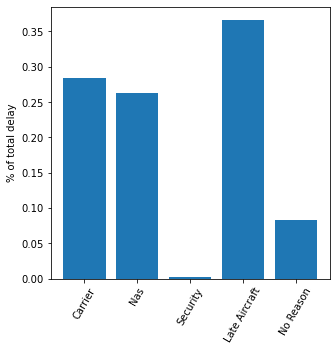

In [73]:
deleay_resons = ["CARRIER_DELAY","NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "NO_REASON" ]
xlabels = ["Carrier","Nas", "Security", "Late Aircraft", "No Reason" ]

y = []
tot = []

mask = data["MONTH"] == 9

for reason in deleay_resons:
    # data[reason + "_sum"] = data[reason]/data["ARR_DELAY_NEW"]
    tot.append(data[mask][reason].sum())
    y.append(data[mask][reason + "%"].mean())
    
plt.figure(figsize=(5, 5))


plt.bar(xlabels[:-1], y[:-1])
plt.ylabel("mean % of total arrival delay")
plt.xticks(rotation=60)
print("for September")
print(sum(y[:-1]))


percent = tot/sum(tot)
plt.figure(figsize=(5, 5))
plt.bar(xlabels, percent)
plt.xticks(rotation=60)
plt.ylabel("% of total delay")

## Linear Regression

In [10]:
%%time
#split 30-70 test-train data of columns i care about
data = data.dropna()
data_jan = data[data['MONTH']==12]
data_lr = data_jan.filter(['ARR_DELAY_NEW', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
                           'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'])
#'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'
# data_lr = data_lr.dropna()
target_lr = data_jan["ARR_DELAY_NEW"].values
# target_lr = target_lr.dropna()
train_data, test_data, train_target, test_target = train_test_split(
    data_lr, target_lr, test_size=0.3, random_state=999)
train_data

CPU times: total: 1.95 s
Wall time: 1.99 s


,ARR_DELAY_NEW,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
2892179,81.0,33.0,0.0,0.0,0.0,48.0
2617147,26.0,0.0,0.0,26.0,0.0,0.0
2876374,16.0,0.0,0.0,0.0,0.0,16.0
2691493,19.0,3.0,0.0,16.0,0.0,0.0
2504680,86.0,6.0,0.0,0.0,0.0,80.0
...,...,...,...,...,...,...
2484045,56.0,10.0,0.0,2.0,0.0,44.0
2889786,16.0,0.0,0.0,16.0,0.0,0.0
3049777,36.0,0.0,0.0,0.0,0.0,36.0
2867560,15.0,0.0,0.0,15.0,0.0,0.0


In [12]:
%%time
#carrier delay
encoded_train_data_car = train_data[['CARRIER_DELAY']]
encoded_test_data_car = test_data[['CARRIER_DELAY']]

linear_model_car = LinearRegression()
linear_model_car.fit(X=encoded_train_data_car, y=train_target)
predicted_car = linear_model_car.predict(encoded_test_data_car)
predicted2_car= linear_model_car.predict(encoded_train_data_car)

print("done mate")
#mse_train = mean_squared_error(train_target["ArrDelayMinutes"].values ,train_target["predicted"].values )
#mse_test = mean_squared_error(test_target["ArrDelayMinutes"].values ,test_target["predicted"].values )
mse_test_car = mean_squared_error(test_target, predicted_car)
mse_train_car= mean_squared_error(train_target, predicted2_car)

#weather delay
encoded_train_data_weath = train_data[['WEATHER_DELAY']]
encoded_test_data_weath = test_data[['WEATHER_DELAY']]

linear_model_weath = LinearRegression()
linear_model_weath.fit(X=encoded_train_data_weath, y=train_target)
predicted_weath = linear_model_weath.predict(encoded_test_data_weath)
predicted2_weath= linear_model_weath.predict(encoded_train_data_weath)

mse_test_weath = mean_squared_error(test_target, predicted_weath)
mse_train_weath= mean_squared_error(train_target, predicted2_weath)

#nas delay
encoded_train_data_nas = train_data[['NAS_DELAY']]
encoded_test_data_nas = test_data[['NAS_DELAY']]

linear_model_nas = LinearRegression()
linear_model_nas.fit(X=encoded_train_data_nas, y=train_target)
predicted_nas = linear_model_nas.predict(encoded_test_data_nas)
predicted2_nas= linear_model_nas.predict(encoded_train_data_nas)

mse_test_nas = mean_squared_error(test_target, predicted_nas)
mse_train_nas= mean_squared_error(train_target, predicted2_nas)


#security delay
encoded_train_data_sec = train_data[['SECURITY_DELAY']]
encoded_test_data_sec = test_data[['SECURITY_DELAY']]

linear_model_sec = LinearRegression()
linear_model_sec.fit(X=encoded_train_data_sec, y=train_target)
predicted_sec = linear_model_sec.predict(encoded_test_data_sec)
predicted2_sec= linear_model_sec.predict(encoded_train_data_sec)

mse_test_sec = mean_squared_error(test_target, predicted_sec)
mse_train_sec= mean_squared_error(train_target, predicted2_sec)

#late aircraft
encoded_train_data_late = train_data[['LATE_AIRCRAFT_DELAY']]
encoded_test_data_late = test_data[['LATE_AIRCRAFT_DELAY']]

linear_model_late = LinearRegression()
linear_model_late.fit(X=encoded_train_data_late, y=train_target)
predicted_late = linear_model_late.predict(encoded_test_data_late)
predicted2_late= linear_model_late.predict(encoded_train_data_late)

mse_test_late = mean_squared_error(test_target, predicted_late)
mse_train_late= mean_squared_error(train_target, predicted2_late)


#always the same
average = np.mean(test_target)
baseline = np.full(predicted_late.shape, average)
mse_base = mean_squared_error(test_target, baseline)
print(mse_test_car, mse_test_weath, mse_test_nas, mse_test_sec, mse_test_late ,mse_base)


done mate
3747.8410207922584 5614.82611801389 6219.722484343382 6498.717931166782 4896.2683076489675 6500.802031678711
CPU times: total: 250 ms
Wall time: 58.8 ms
